<a href="https://colab.research.google.com/github/anisbagwan/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Anis_Bagwan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

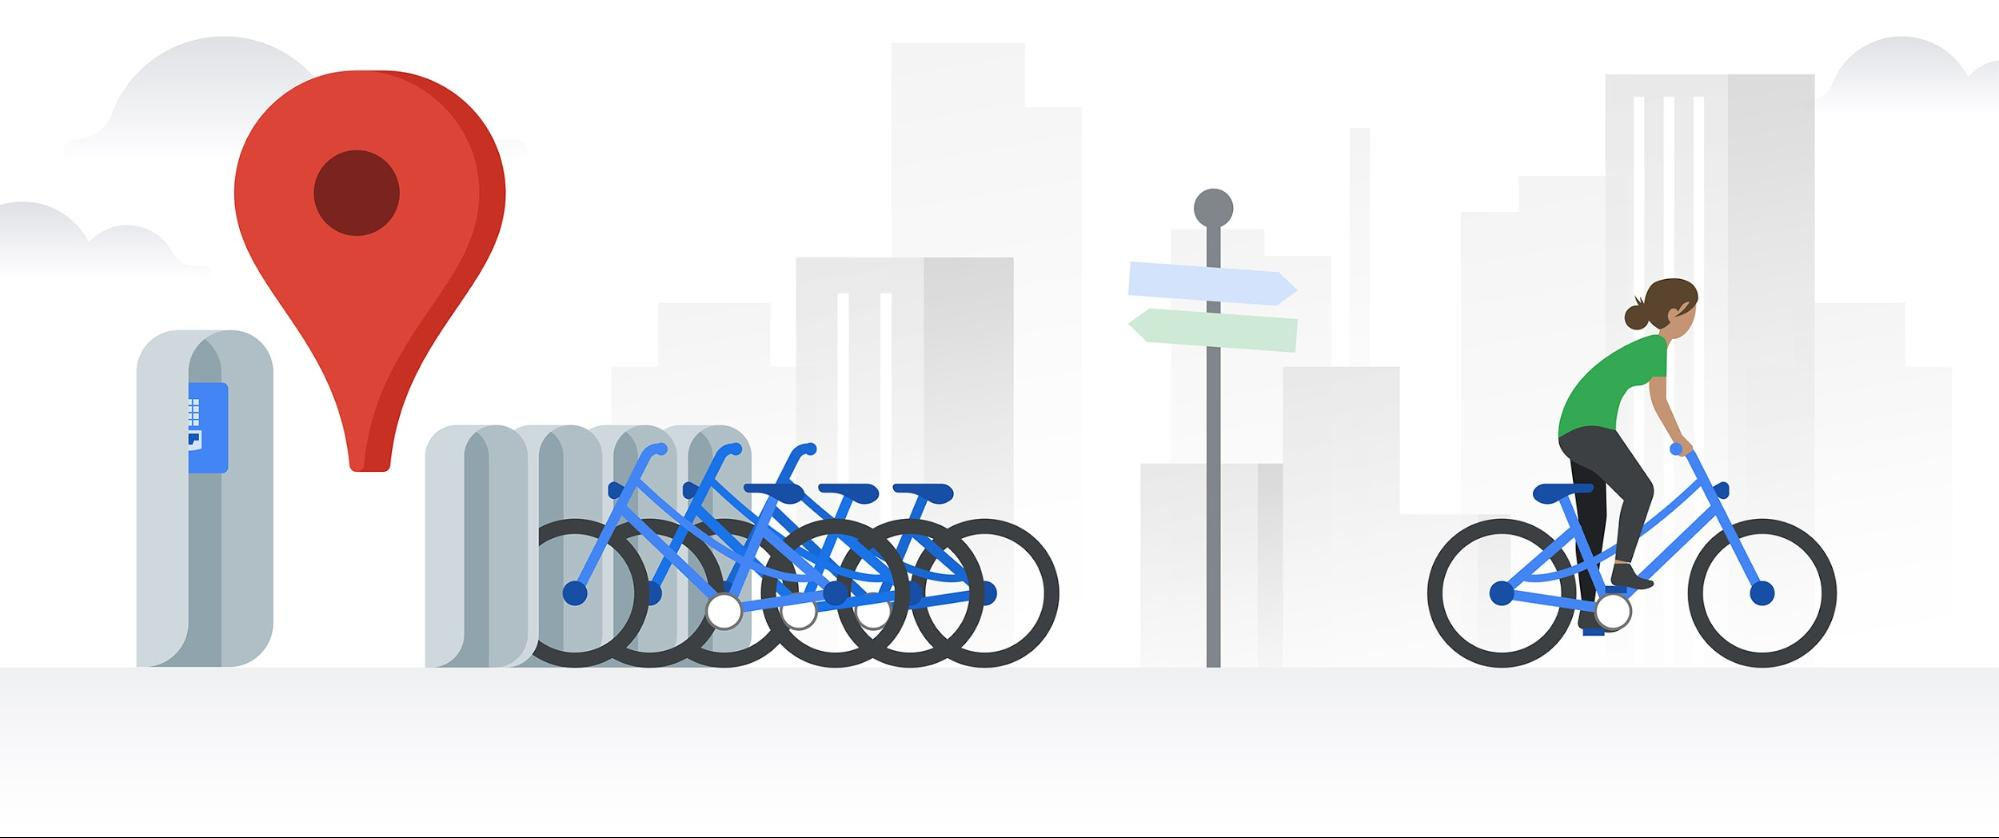

# Importing libraries and dataset

In [107]:
# Mounting drive  
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [109]:
bs_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Capstone Regression/2.Bike Sharing/SeoulBikeData.csv',
                  encoding= 'unicode_escape')

In [110]:
bs_df1=bs_df.copy()

# Initial data check of our dataset

Understanding the data is important step in this domain, so we will start the journey with learning our dataset.

So lets satrt......!!!!!!

First of all we will check the few rows of our dataset to analyse the columns and their values.

In [111]:
bs_df1.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


As we can see their are total 14 columns in our dataset. In this the various types of columns are present like categorical and continuous.

-----------------------------------------------------------------------

In [112]:
# Checking the shpae of dataset (rows,columns)
bs_df1.shape

(8760, 14)

In this dataset there are 8760 rows and 14 columns are present.

--------------------------------------------------------------------------

In [113]:
# Checking columns in the dataset
print(bs_df1.columns)
print('\nNumber of columns:',len(bs_df1.columns))

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Number of columns: 14


Our dataset contains following columns in it:
*  'Date', 

*  'Rented Bike Count',

*  'Hour',
 
*  'Temperature(°C)',
  
*  'Humidity(%)',       
       
*  'Wind speed (m/s)',
       
*  'Visibility (10m)',
        
*  'Dew point temperature(°C)',

*  'Solar Radiation (MJ/m2)',
       
*  'Rainfall(mm)',
        
*  'Snowfall (cm)', 'Seasons',
       
*  'Holiday',
       
*  'Functioning Day'

--------------------------------------------------------------------------


Lets check the info of our dataset.....

In [114]:
# Checking info of dataset
bs_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

From above info we can surely say that the data set has no null values.

------------------------------------------------------------------------

Lets check for Missing values....

In [115]:
# Checking for null values
bs_df1.isnull().sum() 

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Ah...!!! The dataset does not contain any missing value. That is a great thing we have a full informative dataset this time.

-------------------------------------------------------------------------

# Okay then it looks like we are ready to  do Exploratory Data Analysis.....

Lets get started with plotting the total rented bikes with respect to temperature.

Text(0.5, 1.0, 'Rented bike count with respect to TEMPERATURE')

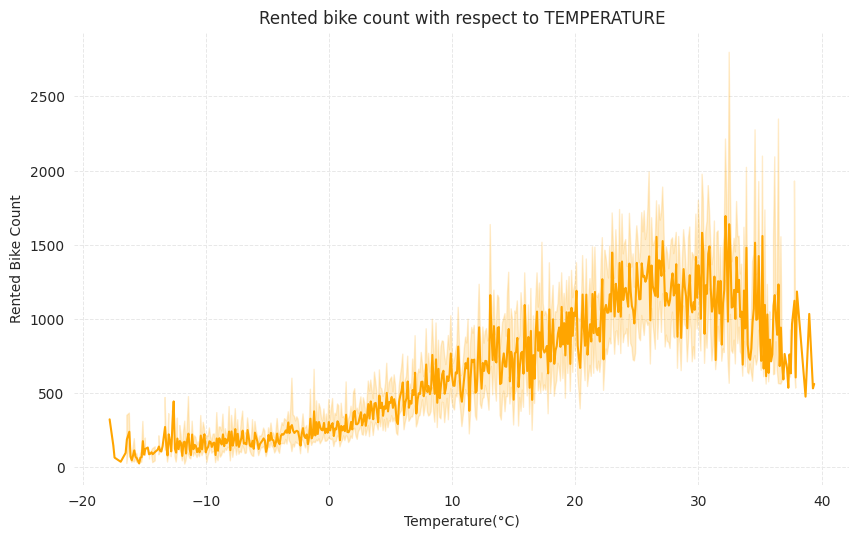

In [116]:
# Let's plot a line plot to display the temperature 
plt.figure(figsize=(10,6), dpi=100)
sns.set_style("whitegrid")

sns.lineplot(data=bs_df1, x="Temperature(°C)", y="Rented Bike Count", 
             color='orange')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.title('Rented bike count with respect to TEMPERATURE')

*  The above plot is showing the bike count along with the respective temperature. From this plot we can observe there is a huge effect of temperature on bike count.

*  When the temperature went above 10°C the bike count started to increase and it was going on to increase. But when the temperature started to fall down below 10°C the bike count also started to fall down.

So there is a huge effect of temperature on rented bike count.

---------------------------------------------------------------------------

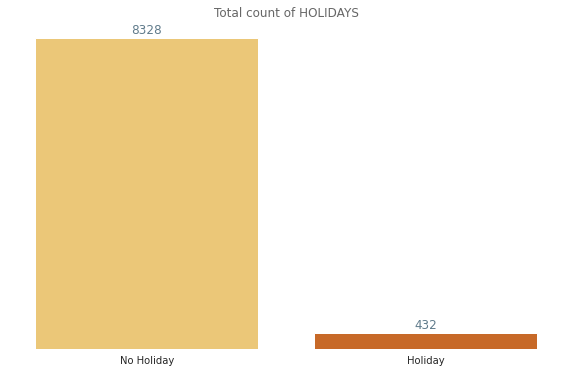

In [117]:
plt.figure(figsize=(10,6))
plt.grid(b=None,axis='both')

#Seasons=bs_df1.groupby('Seasons').sum().reset_index()

# Plotting the values in dependent variable
ax=sns.countplot(bs_df1['Holiday'],palette='YlOrBr')

# make one bar, the python bar, a contrasting color
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="", ylabel = "")
plt.title('Total count of HOLIDAYS',alpha=0.7)


plt.show()

Here in this plot we can clearly see that there are 8328 are no holidays and 432 are holidays in our dataset.

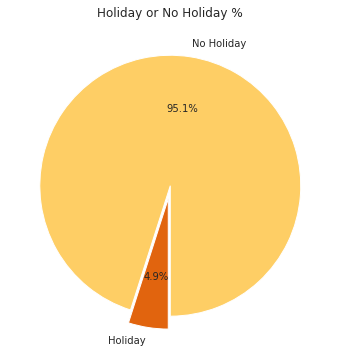

In [118]:
#Creating list of seasons
a=bs_df1['Holiday'].unique()

#Creating list of individual season count
b=[bs_df1['Holiday'].value_counts()]

# Plotting a Pie chart
plt.figure(figsize=(10,6))
explode=[0,0.1]
plt.pie(b, labels=a,colors=sns.color_palette("YlOrBr",2), 
        explode=explode,autopct="%.1f%%",shadow=False,startangle=270)
plt.title('Holiday or No Holiday %')
# displaying chart
plt.show()

*  As we can see from above plot we can see that in our data the 95.1% days are not holidays and only 4.9% days are holidays.
   
-----------------------------------------------------------------------

Lets understand the hour wise bike count of every day in the following plot.

Text(0.5, 1.0, 'Rented bike count per hour in each SEASON')

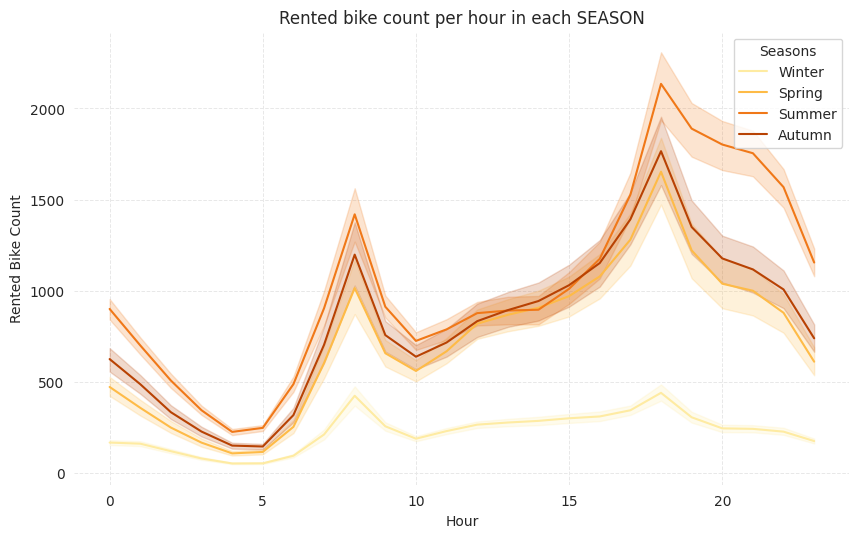

In [119]:
# Plotting rented bike count with respect to hour
plt.figure(figsize=(10,6), dpi=100)
sns.set_style("whitegrid")

sns.lineplot(data=bs_df1, x="Hour", y="Rented Bike Count", 
             hue="Seasons",palette='YlOrBr')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.title('Rented bike count per hour in each SEASON')

From above line plot we can the use of bikes in morning and evening is more as compared to other times.

In morning that is from 7am to 10am the offices,schools and other works start so in that period the use of bikes is high. Also in evening that is from 5pm and onwords these works gets closed so in that period the use increases.

------------------------------------------------------------------------

Lets check the use of bikes in different seasons... 

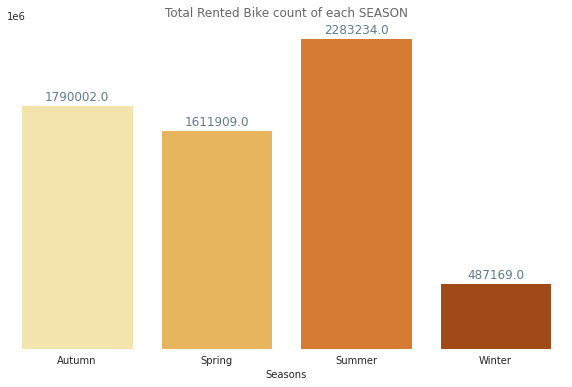

In [120]:
plt.figure(figsize=(10,6))
plt.grid(b=None,axis='both')

Seasons=bs_df1.groupby('Seasons').sum().reset_index()

# Plotting the values in dependent variable
ax=sns.barplot(x='Seasons',y="Rented Bike Count",data=Seasons,palette='YlOrBr')

# make one bar, the python bar, a contrasting color
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Seasons", ylabel = "")
plt.title('Total Rented Bike count of each SEASON',alpha=0.7)


plt.show()

As we can observe in each seasons people took bikes on rent. But in Summer the count of bikes rented is maximum. On the other hand in winter the count is minimum and in Spring and Autumn it is moderate.

From this we can say that the impact of season on rented bikes count is much strong and people react differently in each season differently.

-------------------------------------------------------------------------

## Lets make some new columns to ease our work.

Splitting the date column in day,month and year new columns so that we can analyse the data with respect to dates.

In [121]:
# Changing "Date" columns data type to "datetime"
bs_df1['Date'] = pd.to_datetime(bs_df1['Date'])

In [122]:
# Extracting date column in new day,month and year columns
bs_df1['Day'] = bs_df1['Date'].dt.day
bs_df1['Month'] = bs_df1['Date'].dt.month
bs_df1['Year'] = bs_df1['Date'].dt.year

Created new columns as 'Day','Month' and 'Year'. This transition will help us to determine the various insights from the dataset according to year.

---------------------------------------------------------------------

In [123]:
# Dropping "Date" column
bs_df1.drop(['Date'],axis='columns', inplace=True)

Dropping the 'Date' column as we extracted date in different columns.

---------------------------------------------------------------------

In [124]:
def barplots(x,y,hue,Title):
  plt.figure(figsize=(10,6))
  sns.set_style("whitegrid",{'grid.line_style':'-'})

  sns.barplot(x=x,y=y,hue=hue,data=bs_df1,palette='YlOrBr')
  plt.title(Title,alpha=1)
  

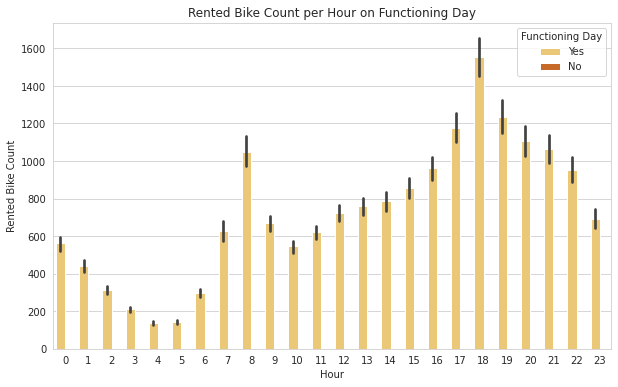

In [125]:
barplots('Hour','Rented Bike Count','Functioning Day',
         'Rented Bike Count per Hour on Functioning Day')

From above bar graph we get to know that there was no bike rent on non functioning day. That means when there a functioning day people use the bikes. The count of bikes increases as the time moves on from 6am to next hours. And by the end of the day the count reach at its peak.

----------------------------------------------------------------------

In [126]:
#Converting Contionus variable to categorical variable for ease in prediction
bs_df1['IsVisibility']=bs_df1['Visibility (10m)'].apply(lambda x: 1 if x>=2000 else 0)
bs_df1['IsRainfall']=bs_df1['Rainfall(mm)'].apply(lambda x:1 if x>=0.148687 else 0)
bs_df1['IsSnowfall']=bs_df1['Snowfall (cm)'].apply(lambda x:1 if x>=0.075068 else 0)
bs_df1['IsSolar_Radiation']=bs_df1['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x>=0.56911 else 0)


In [127]:
#Mapping the Variables
bs_df1['Functioning_Day']=bs_df1['Functioning Day'].map({'Yes':1,'No':0})
bs_df1['IsHoliday']=bs_df1['Holiday'].map({'No Holiday':0,'Holiday':1})


In [128]:
#After Conversion of numerical variable to categorical droping the original columns to avoid ambiguity
bs_df1.drop(['Visibility (10m)','Rainfall(mm)','Snowfall (cm)',
             'Solar Radiation (MJ/m2)','Holiday'],axis=1,inplace=True)


In [129]:
bs_df1.drop(['Functioning Day'],axis=1,inplace=True)

In [130]:
bs_df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C),Seasons,Day,Month,Year,IsVisibility,IsRainfall,IsSnowfall,IsSolar_Radiation,Functioning_Day,IsHoliday
0,254,0,-5.2,37,2.2,-17.6,Winter,12,1,2017,1,0,0,0,1,0
1,204,1,-5.5,38,0.8,-17.6,Winter,12,1,2017,1,0,0,0,1,0
2,173,2,-6.0,39,1.0,-17.7,Winter,12,1,2017,1,0,0,0,1,0
3,107,3,-6.2,40,0.9,-17.6,Winter,12,1,2017,1,0,0,0,1,0
4,78,4,-6.0,36,2.3,-18.6,Winter,12,1,2017,1,0,0,0,1,0


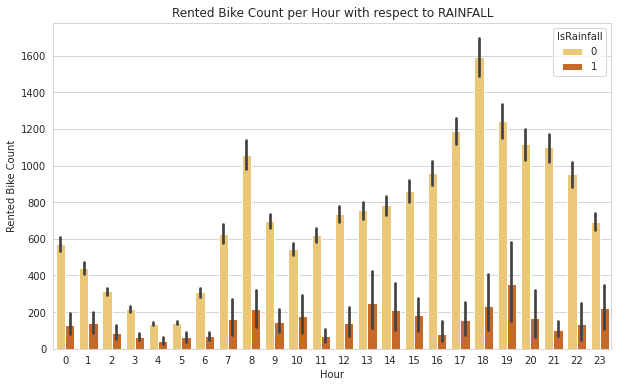

In [131]:
barplots('Hour','Rented Bike Count','IsRainfall','Rented Bike Count per Hour with respect to RAINFALL')

From above bar graph we can say that when there is rainfall the count of rent bikes is less. That means people avoid taking bikes on rent on rainy day.

-----------------------------------------------------------------------

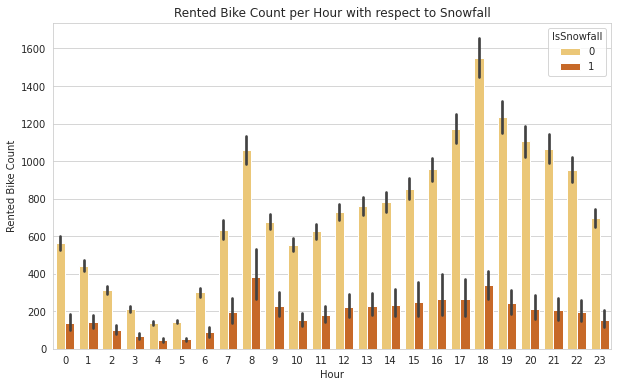

In [132]:
# Plotting the effect of snowfall per hour
barplots('Hour','Rented Bike Count','IsSnowfall','Rented Bike Count per Hour with respect to Snowfall')

Above plot is showing the result of the effect of snowfall on rented bike count in each hour.

As we can see when there is snowfall the count is less on the other hand when there is no snowfall the count is high.From this we can conclude that there is a huge effect of snowfall on the bike count in snowfall.

------------------------------------------------------------------------

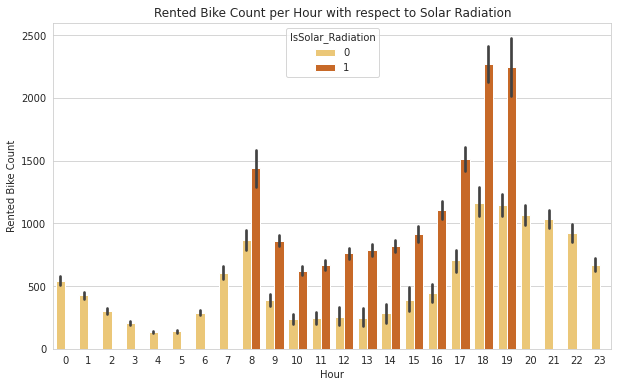

In [133]:
# Plotting the effect of solar radiations on rented bikes count
barplots('Hour','Rented Bike Count','IsSolar_Radiation',
         'Rented Bike Count per Hour with respect to Solar Radiation')

The plot gives the instance about the count of bike when there are solar radiations. As we can observe whent there are radiations in the atmosphere the count increases but when there is no radiations or less radiations the count decreases.

From this we can conclude that people come outside when the solar radiations are present that means people prefers warm atmoshphere to go outside.

-------------------------------------------------------------------------

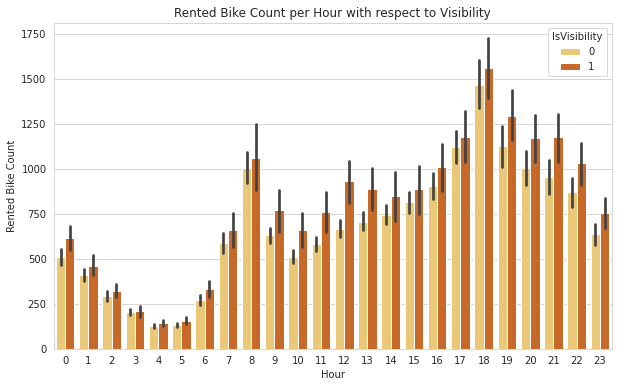

In [134]:
# Plotting the bike count per hour with respect to visibility 
barplots('Hour','Rented Bike Count','IsVisibility',
         'Rented Bike Count per Hour with respect to Visibility')

From above plot we can say there is not much effect of visibility on rented bike count.

From this we can conclude that the count of bikes is almost same when there is no visibilty and there is visibilty.

-------------------------------------------------------------------------


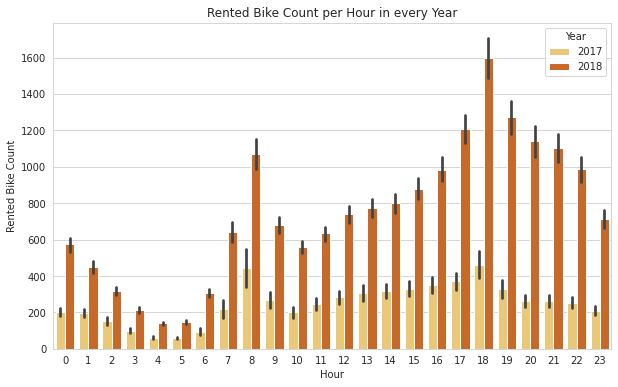

In [135]:
#Plotting the rented bike count in each year eith respect to hour
barplots('Hour','Rented Bike Count','Year',
         'Rented Bike Count per Hour in every Year')

From above plot it seems that the count of bikes increased from previous year. That is the in every hour the count is greater than 2017 compared to 2018.

----------------------------------------------------------------------------

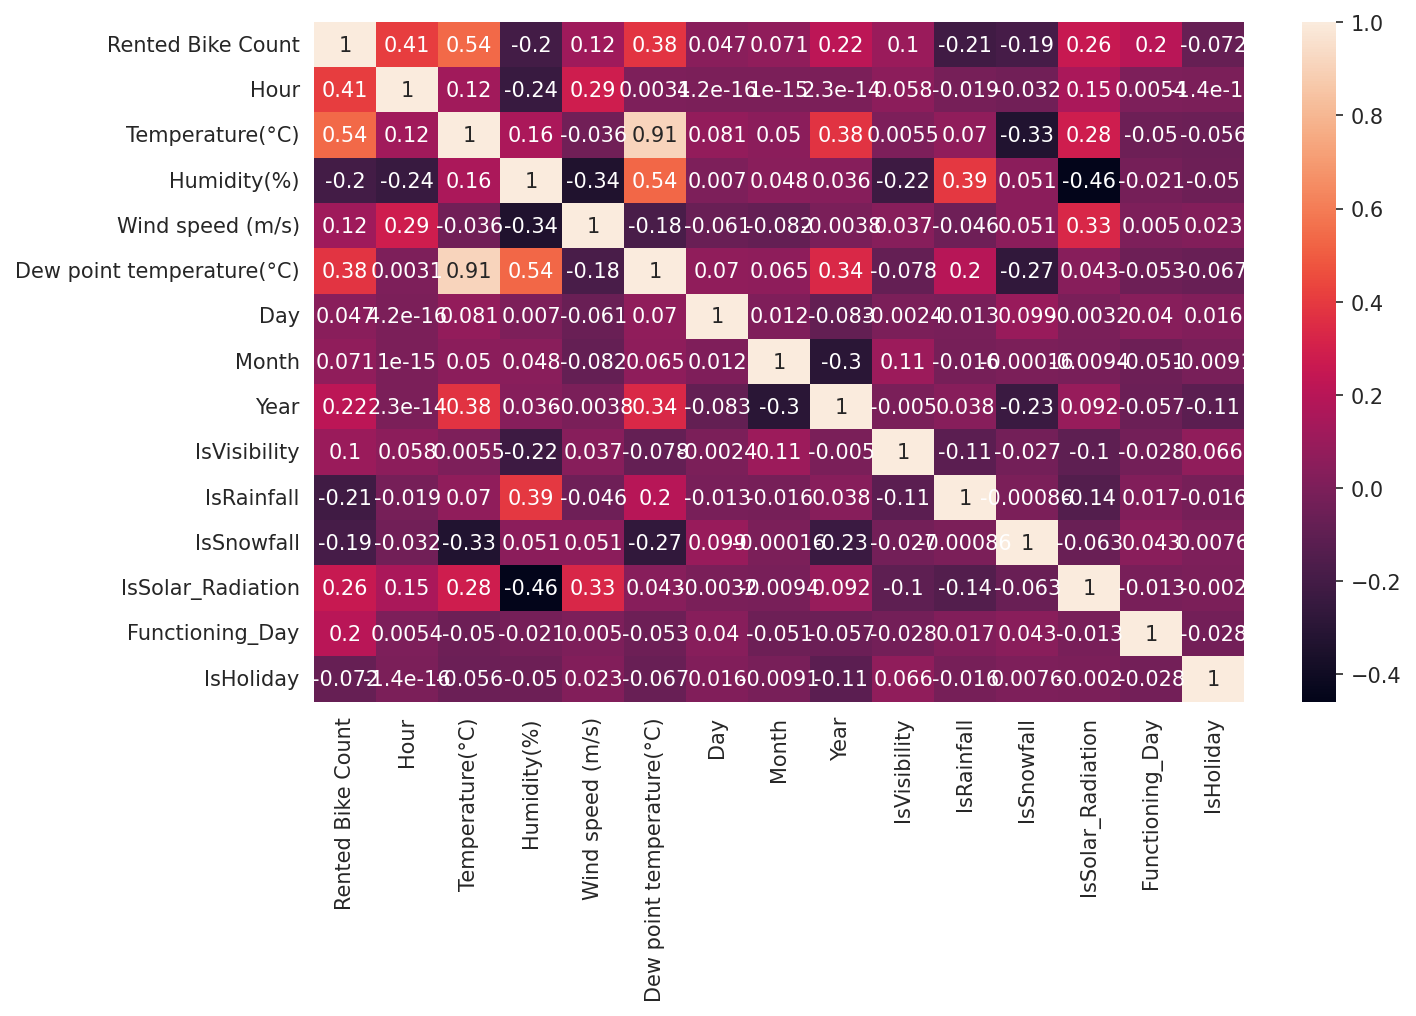

In [136]:
plt.figure(figsize=(10,6), dpi=150)
sns.heatmap(bs_df1.corr(),annot=True)

From above correlation plot we can say there is 91% correlation between 'Temperature' and 'Dew point temperature'. So that we have to work on this problem.



Lets drop the 'Dew point temperature' column because it does not affect the bike count that much.

In [137]:
bs_df1 = bs_df1.drop(columns=['Dew point temperature(°C)'], axis=1)

# Now lets do some feature engineering... 

From above EDA we knew that there was no bike rented on non-functiononig day so that we dont need that rows so we are going to drop those.

In [138]:
bs_df1=bs_df1[bs_df1['Functioning_Day']!=0]

------------------------------------------------------------------------

Creating the dummy variables of Seasons for ease in prediction.

In [139]:
bs_df1['Summer_season']=np.where(bs_df1['Seasons']=='Summer',1,0)
bs_df1['Winter_season']=np.where(bs_df1['Seasons']=='Winter',1,0)
bs_df1['Spring_season']=np.where(bs_df1['Seasons']=='Spring',1,0)
bs_df1['Autumn_season']=np.where(bs_df1['Seasons']=='Autumn',1,0)

In [140]:
# Dropping the season column because we encoded the data 
bs_df1.fillna(0,inplace=True)
bs_df1.drop('Seasons',axis=1,inplace=True)

In [141]:
# Checking the null values in final dataset
bs_df1.isnull().sum()

Rented Bike Count    0
Hour                 0
Temperature(°C)      0
Humidity(%)          0
Wind speed (m/s)     0
Day                  0
Month                0
Year                 0
IsVisibility         0
IsRainfall           0
IsSnowfall           0
IsSolar_Radiation    0
Functioning_Day      0
IsHoliday            0
Summer_season        0
Winter_season        0
Spring_season        0
Autumn_season        0
dtype: int64

In [142]:
bs_df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Day,Month,Year,IsVisibility,IsRainfall,IsSnowfall,IsSolar_Radiation,Functioning_Day,IsHoliday,Summer_season,Winter_season,Spring_season,Autumn_season
0,254,0,-5.2,37,2.2,12,1,2017,1,0,0,0,1,0,0,1,0,0
1,204,1,-5.5,38,0.8,12,1,2017,1,0,0,0,1,0,0,1,0,0
2,173,2,-6.0,39,1.0,12,1,2017,1,0,0,0,1,0,0,1,0,0
3,107,3,-6.2,40,0.9,12,1,2017,1,0,0,0,1,0,0,1,0,0
4,78,4,-6.0,36,2.3,12,1,2017,1,0,0,0,1,0,0,1,0,0


# So everything is set, now we will move ahead towards prediction...

Let's start ML modelling...

In [143]:
# Storing the dependent variable to separate out independent and dependent variables
dependent_variable = 'Rented Bike Count'

In [144]:
# Create a list of independent variables
independent_variables = list(set(bs_df1.columns.tolist()) - {dependent_variable})

In [145]:
# Create the data of independent variables
X = bs_df1[independent_variables].values

# Create the dependent variable data
y = bs_df1[dependent_variable].values

In [146]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 12)

In [147]:
# Scaling the data to ease in fitting the models
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Applying Linear Regression

In [148]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [149]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [150]:
# Checking prfromance of model
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))                      # Checking prfromance of model using "Root Mean Squared Error"
print('MSE:',mean_squared_error(y_test, y_pred))                                # Test performance using " Mean Squared Error"
print('MAE:',mean_absolute_error(y_test,y_pred))                                # Test performance using " Mean Absolute Error"
print('R2 score:',r2_score(y_test, y_pred))                                     # Checking " R2 score"

RMSE: 426.1685056208137
MSE: 181619.5951830775
MAE: 318.3938393756589
R2 score: 0.5563543127816144


Text(0, 0.5, 'Actual')

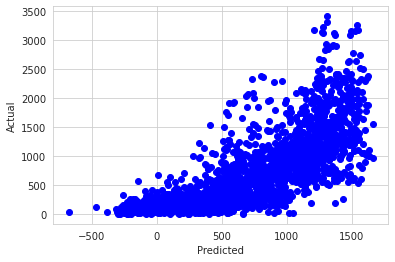

In [151]:
plt.scatter(y_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')

##  Applying Decision Tree Algorithm

In [152]:
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [153]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [154]:
# Checking prfromance of model
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))                      # Checking prfromance of model using "Root Mean Squared Error"
print('MSE:',mean_squared_error(y_test, y_pred))                                # Test performance using " Mean Squared Error"
print('MAE:',mean_absolute_error(y_test,y_pred))                                # Test performance using " Mean Absolute Error"
print('R2 score:',r2_score(y_test, y_pred))                                     # Checking " R2 score"

RMSE: 331.4385985950332
MSE: 109851.54463863958
MAE: 188.9655172413793
R2 score: 0.7316635137079561


Text(0, 0.5, 'Actual')

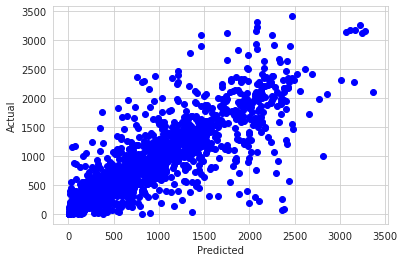

In [155]:
plt.scatter(y_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Applying XGBoost

In [156]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)

[11:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, n_estimators=1000)

In [157]:
# Predicting the Test set results
y_pred = xgb.predict(X_test)

In [158]:
# Checking prfromance of model
print('MSE:',mean_squared_error(y_test, y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score:',r2_score(y_test, y_pred))

MSE: 65260.72068013477
MAE: 170.84449261615566
RMSE: 255.46177929415344
R2 score: 0.8405863792102364


Text(0, 0.5, 'Actual')

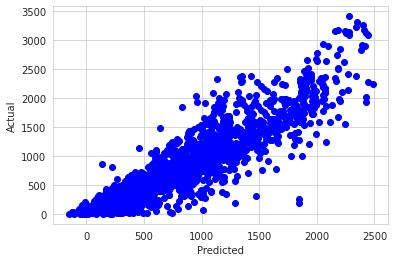

In [159]:
plt.scatter(y_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')

##  Applying Random Forest Algorithm

In [160]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [161]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [162]:
# Checking prfromance of model
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))                      # Checking prfromance of model using "Root Mean Squared Error"
print('MSE:',mean_squared_error(y_test, y_pred))                                # Test performance using " Mean Squared Error"
print('MAE:',mean_absolute_error(y_test,y_pred))                                # Test performance using " Mean Absolute Error"
print('R2 score:',r2_score(y_test, y_pred))                                     # Checking " R2 score"

RMSE: 230.28707940371484
MSE: 53032.13894029286
MAE: 140.9212376003779
R2 score: 0.8704573716227547


Text(0, 0.5, 'Actual')

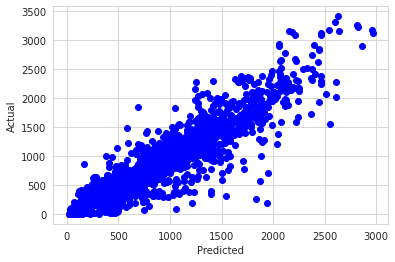

In [163]:
plt.scatter(y_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# So here we are, let's discuss about the conclusion of this analysis....

So we are at the end of our project. In this Seoul Bike Sharing Demand Prediction project we have analyzed its dataset.

Through this analysis we got to know that the highest number of bike rents occur in "summer" while the least bike rents occur in "winter". In hourly basis, the bike counts increases in the afternoon (from 3pm to 8pm). There are two times increase in bike count occurences, at 7am and at 5pm, which is most likely to be caused by workers going to office in the morning and going back home in the afternoon. 

From analysis, we saw that in general the number of bike rents in 2018 was more than in 2017. The bike counts peak in the afternoon (from 3pm to 8pm) where temperature is the highest, with the most visibility, windspeed, and least humidity. 

There were days in a weekday when the bike sharing facility was not functioning. However, during public holidays, the facility was still operating.



Based on this analysis, we built an Random Forest model to predict the number of bike rents. Also we used various other models like Linear Regression, Decision Trees but in this model we couldn not get much scores. So that finally we went to Random Forest model.

We made new features such as day,month and year derived from the dates. We achieved an R2 accuracy of 86.7% based on Random Forest algorithm.

Finally, it was found that rainfall, snowfall, every seasons and temperature are the most determining weather predictors.





